In [1]:
import numpy as np 
from numpy.random import multivariate_normal as mvn 
# -- nonGaussLike -- 
from nongausslike import knn as kNN
from nongausslike import nongauss as NG

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Lets calculate 
$$KL(X_{1:n} || Y_{1:m})$$

The Wang et al. (2009) estimator calculates the KL divergence as: 
$$D(X_{1:n}||Y_{1:m}) = \frac{d}{n}\sum\limits_{i=1}^n \log \frac{\nu_k(i)}{\rho_k(k)} + \log \frac{m}{n-1}$$

In [3]:
d = 37
n = 2018
Cov = np.identity(d) * 0.75
X = mvn(np.zeros(d), Cov, size=n)

In [4]:
ms = [100, 500, 1000, 2000, 4000]
kls_skl_k2, kls_0_k2, kls_1, kls_2 = [], [], [], []
for m in ms: 
    kl_skl, kl_0, kl_1, kl_2 = [], [], [], []
    for i in range(10): 
        Y = mvn(np.zeros(d), Cov, size=m)
        kl_skl.append(NG.kNNdiv_gauss(X, None, Knn=2, div_func='kl', gauss=Y))
        kl_0.append(kNN.KL_w2009_eq5(X, Y, k=2))
        kl_1.append(kNN.KL_w2009_eq29(X, Y))
        kl_2.append(kNN.KL_w2009_eq5W(X, Y))
    kls_skl_k2.append(kl_skl)
    kls_0_k2.append(kl_0)
    kls_1.append(kl_1)
    kls_2.append(kl_2)    

(-0.5, 0.5)

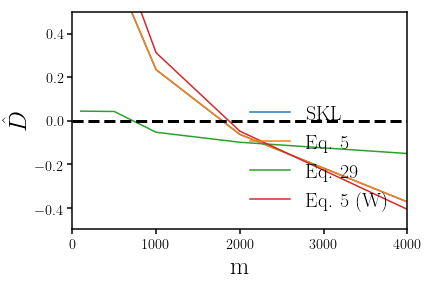

In [5]:
fig = plt.figure()
sub = fig.add_subplot(111)
kls_list = [kls_skl_k2, kls_0_k2, kls_1, kls_2]
kls_label = ['SKL', 'Eq. 5', 'Eq. 29', 'Eq. 5 (W)']
for kls, lbl in zip(kls_list, kls_label): 
    sub.plot(ms, [np.average(kl) for kl in kls], label=lbl)
sub.plot([0., 5000.], [0., 0.], c='k', lw=3, ls='--')
sub.legend(loc="lower right", fontsize=20)
sub.set_xlabel('m', fontsize=25)
sub.set_xlim([0., 4000.])
sub.set_ylabel(r'$\hat{D}$', fontsize=25)
sub.set_ylim([-0.5, 0.5])
#sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)

(-1.0, 1.0)

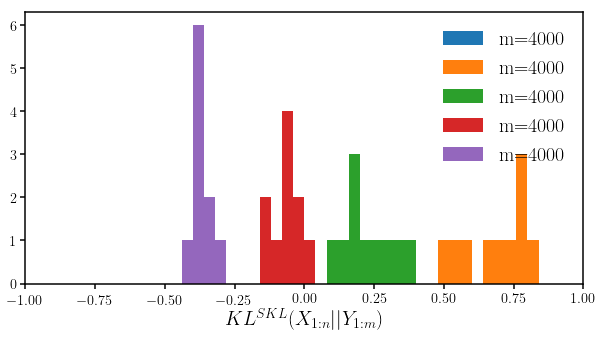

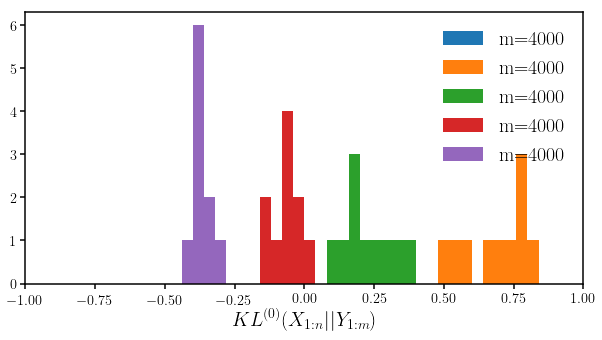

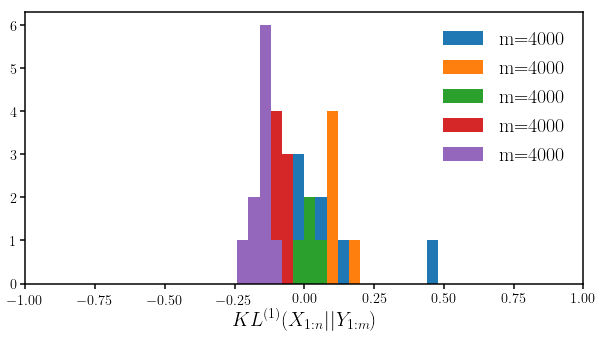

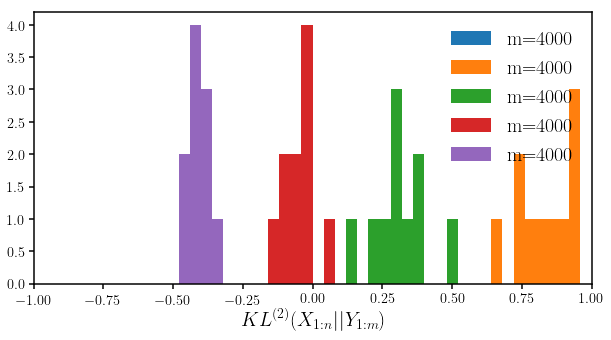

In [7]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i_m in range(len(ms)):
    sub.hist(kls_skl_k2[i_m], range=(-1., 1.), bins=50, label='m='+str(m))
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$KL^{SKL}(X_{1:n} || Y_{1:m})$', fontsize=20)
sub.set_xlim([-1., 1.])

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i_m in range(len(ms)):
    sub.hist(kls_0_k2[i_m], range=(-1., 1.), bins=50, label='m='+str(m))
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$KL^{(0)}(X_{1:n} || Y_{1:m})$', fontsize=20)
sub.set_xlim([-1., 1.])

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i_m in range(len(ms)):
    sub.hist(kls_1[i_m], range=(-1., 1.), bins=50, label='m='+str(m))
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$KL^{(1)}(X_{1:n} || Y_{1:m})$', fontsize=20)
sub.set_xlim([-1., 1.])

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i_m in range(len(ms)):
    sub.hist(kls_2[i_m], range=(-1., 1.), bins=50, label='m='+str(m))
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$KL^{(2)}(X_{1:n} || Y_{1:m})$', fontsize=20)
sub.set_xlim([-1., 1.])

In [8]:
kls_skl_k2_yx, kls_0_k2_yx, kls_1_yx, kls_2_yx = [], [], [], []
for m in ms: 
    kl_skl, kl_0, kl_1, kl_2 = [], [], [], []
    for i in range(10): 
        Y = mvn(np.zeros(d), Cov, size=m)
        kl_skl.append(NG.kNNdiv_gauss(Y, None, Knn=2, div_func='kl', gauss=X))
        kl_0.append(kNN.KL_w2009_eq5(Y, X, k=2))
        kl_1.append(kNN.KL_w2009_eq29(Y, X))
        kl_2.append(kNN.KL_w2009_eq5W(Y, X))
    kls_skl_k2_yx.append(kl_skl)
    kls_0_k2_yx.append(kl_0)
    kls_1_yx.append(kl_1)
    kls_2_yx.append(kl_2)    

(-1.0, 1.0)

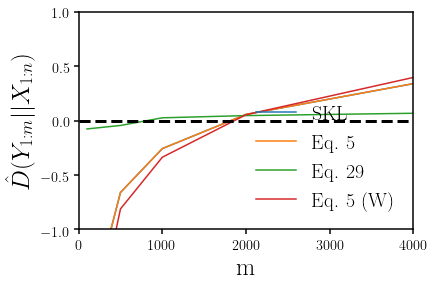

In [9]:
fig = plt.figure()
sub = fig.add_subplot(111)
kls_list = [kls_skl_k2_yx, kls_0_k2_yx, kls_1_yx, kls_2_yx]
kls_label = ['SKL', 'Eq. 5', 'Eq. 29', 'Eq. 5 (W)']
for kls, lbl in zip(kls_list, kls_label): 
    sub.plot(ms, [np.average(kl) for kl in kls], label=lbl)
sub.plot([0., 5000.], [0., 0.], c='k', lw=3, ls='--')
sub.legend(loc="lower right", fontsize=20)
sub.set_xlabel('m', fontsize=25)
sub.set_xlim([0., 4000.])
sub.set_ylabel(r'$\hat{D}(Y_{1:m} || X_{1:n})$', fontsize=25)
sub.set_ylim([-1., 1.])
#sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)

There's clearly a dependence on $m$ of the reference sample in the accuracy of the KL divergence estimator. Now lets try for the more realistic $P(k)$ situation

In [10]:
X_pk = NG.X_pk_all('patchy.z1', NorS='ngc', sys='fc')
X_res, _ = NG.meansub(X_pk)
X_w, W = NG.whiten(X_res)
C_x = np.cov(X_w.T)

In [11]:
dim = X_pk.shape[1]

In [12]:
pk_kls_skl_k2, pk_kls_0_k2, pk_kls_1, pk_kls_2 = [], [], [], []
for m in ms: 
    kl_skl, kl_0, kl_1, kl_2 = [], [], [], []
    for i in range(10): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl_skl.append(NG.kNNdiv_gauss(X_w, None, Knn=2, div_func='kl', gauss=Y))
        kl_0.append(kNN.KL_w2009_eq5(X_w, Y, k=2))
        kl_1.append(kNN.KL_w2009_eq29(X_w, Y))
        kl_2.append(kNN.KL_w2009_eq5W(X_w, Y))
    pk_kls_skl_k2.append(kl_skl)
    pk_kls_0_k2.append(kl_0)
    pk_kls_1.append(kl_1)
    pk_kls_2.append(kl_2)    

In [19]:
X_w_gauss = mvn(np.zeros(dim), C_x, size=X_w.shape[0])

ref_kls_skl_k2, ref_kls_0_k2, ref_kls_1, ref_kls_2 = [], [], [], []
for m in ms: 
    kl_skl, kl_0, kl_1, kl_2 = [], [], [], []
    for i in range(10): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl_skl.append(NG.kNNdiv_gauss(X_w_gauss, None, Knn=2, div_func='kl', gauss=Y))
        kl_0.append(kNN.KL_w2009_eq5(X_w_gauss, Y, k=2))
        kl_1.append(kNN.KL_w2009_eq29(X_w_gauss, Y))
        kl_2.append(kNN.KL_w2009_eq5W(X_w_gauss, Y))
    ref_kls_skl_k2.append(kl_skl)
    ref_kls_0_k2.append(kl_0)
    ref_kls_1.append(kl_1)
    ref_kls_2.append(kl_2)    

In [21]:
pk_kls_list = [pk_kls_skl_k2, pk_kls_0_k2, pk_kls_1, pk_kls_2]
ref_kls_list = [ref_kls_skl_k2, ref_kls_0_k2, ref_kls_1, ref_kls_2]

(-1.0, 1.0)

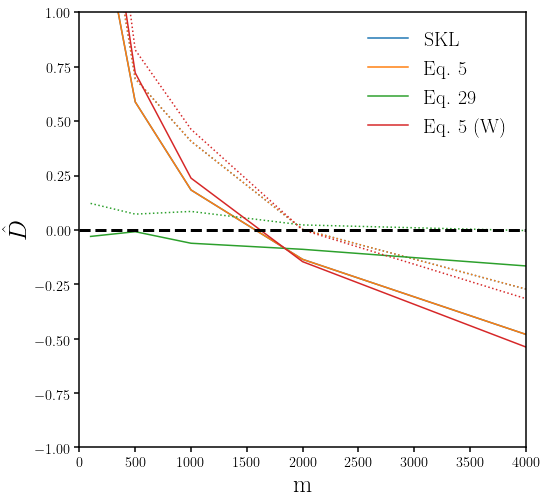

In [23]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
kls_label = ['SKL', 'Eq. 5', 'Eq. 29', 'Eq. 5 (W)']
for i_kls, kls, kls_ref, lbl in zip(range(len(kls_label)), pk_kls_list, ref_kls_list, kls_label): 
    sub.plot(ms, [np.average(kl) for kl in kls], c='C'+str(i_kls), label=lbl)
    sub.plot(ms, [np.average(kl) for kl in kls_ref], c='C'+str(i_kls), ls=':')
sub.plot([0., 5000.], [0., 0.], c='k', lw=3, ls='--')
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel('m', fontsize=25)
sub.set_xlim([0., 4000.])
sub.set_ylabel(r'$\hat{D}$', fontsize=25)
sub.set_ylim([-1., 1.])
#sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)

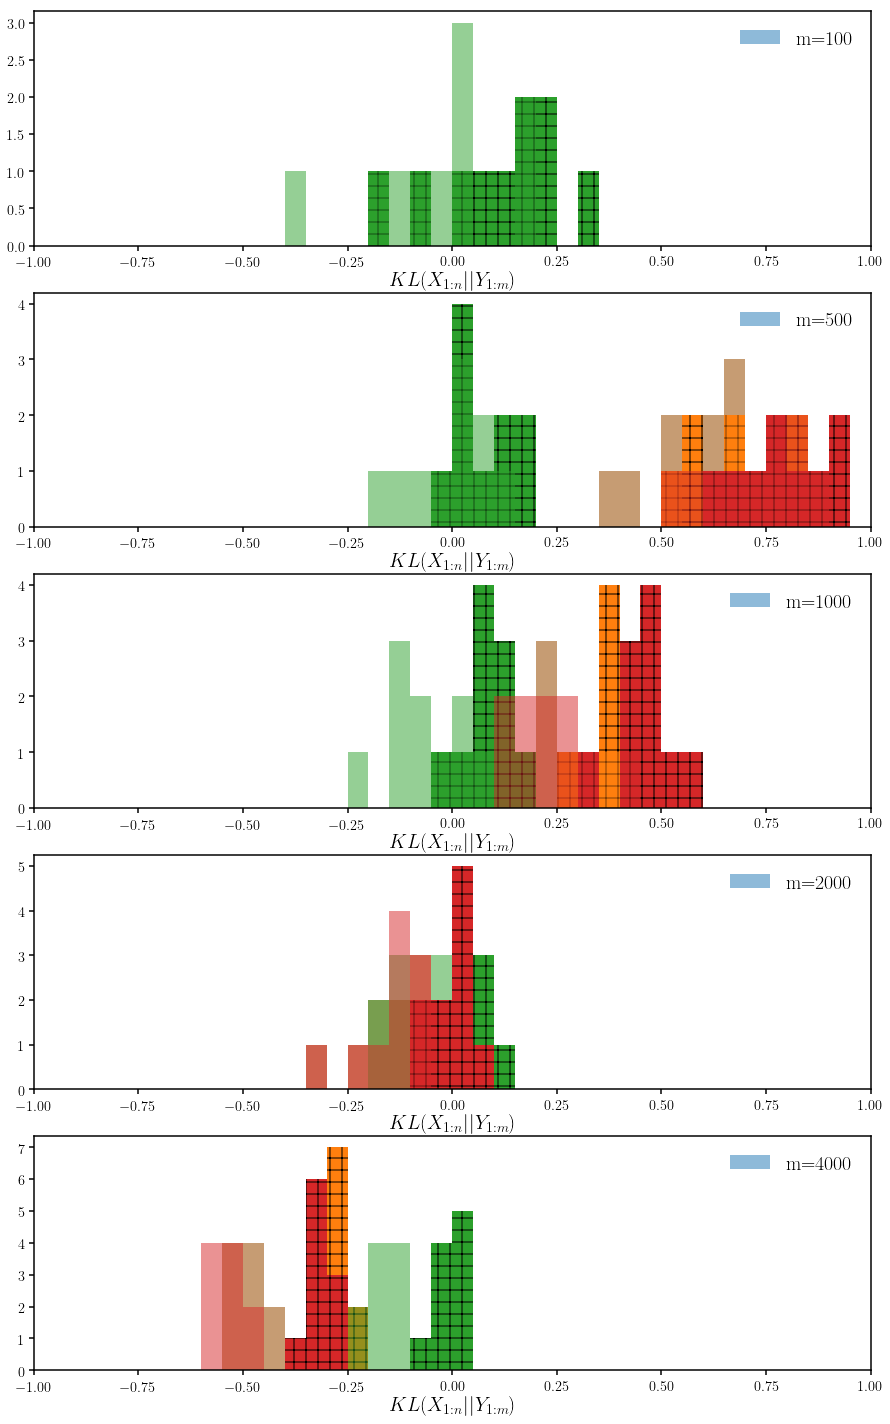

In [46]:
fig = plt.figure(figsize=(15, 5*len(ms)))
for i_m, m in enumerate(ms):
    sub = fig.add_subplot(len(ms),1,i_m+1)
    for ii in range(len(pk_kls_list)): 
        sub.hist(ref_kls_list[ii][i_m], range=(-1, 1), bins=40, color='C'+str(ii), hatch='+')
        sub.hist(pk_kls_list[ii][i_m], range=(-1, 1), bins=40, alpha=0.5, color='C'+str(ii), label='m='+str(m))
        if ii == 0: sub.legend(loc="upper right", fontsize=20)
    sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)
    sub.set_xlim([-1, 1])

In [39]:
pk_kls_skl_k2_yx, pk_kls_0_k2_yx, pk_kls_1_yx, pk_kls_2_yx = [], [], [], []
for m in ms: 
    kl_skl, kl_0, kl_1, kl_2 = [], [], [], []
    for i in range(10): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl_skl.append(NG.kNNdiv_gauss(Y, None, Knn=2, div_func='kl', gauss=X_w))
        kl_0.append(kNN.KL_w2009_eq5(Y, X_w, k=2))
        kl_1.append(kNN.KL_w2009_eq29(Y, X_w))
        kl_2.append(kNN.KL_w2009_eq5W(Y, X_w))
    pk_kls_skl_k2_yx.append(kl_skl)
    pk_kls_0_k2_yx.append(kl_0)
    pk_kls_1_yx.append(kl_1)
    pk_kls_2_yx.append(kl_2)    

In [40]:
ref_kls_skl_k2_yx, ref_kls_0_k2_yx, ref_kls_1_yx, ref_kls_2_yx = [], [], [], []
for m in ms: 
    kl_skl, kl_0, kl_1, kl_2 = [], [], [], []
    for i in range(10): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl_skl.append(NG.kNNdiv_gauss(Y, None, Knn=2, div_func='kl', gauss=X_w_gauss))
        kl_0.append(kNN.KL_w2009_eq5(Y, X_w_gauss, k=2))
        kl_1.append(kNN.KL_w2009_eq29(Y, X_w_gauss))
        kl_2.append(kNN.KL_w2009_eq5W(Y, X_w_gauss))
    ref_kls_skl_k2_yx.append(kl_skl)
    ref_kls_0_k2_yx.append(kl_0)
    ref_kls_1_yx.append(kl_1)
    ref_kls_2_yx.append(kl_2)    

In [41]:
pk_kls_yx_list = [pk_kls_skl_k2_yx, pk_kls_0_k2_yx, pk_kls_1_yx, pk_kls_2_yx]
ref_kls_yx_list = [ref_kls_skl_k2_yx, ref_kls_0_k2_yx, ref_kls_1_yx, ref_kls_2_yx]

In [48]:
[np.average(kl) for kl in pk_kls_skl_k2_yx]

[-1.6242272, -0.6708245, -0.28262463, 0.083861314, 0.35579556]

(-1.0, 1.0)

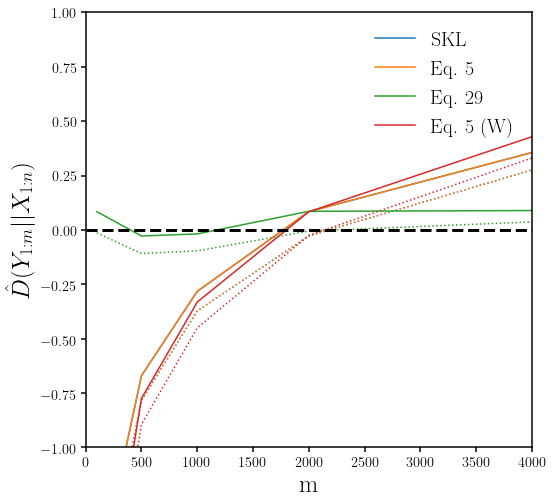

In [43]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
kls_label = ['SKL', 'Eq. 5', 'Eq. 29', 'Eq. 5 (W)']
for i_kls, kls, kls_ref, lbl in zip(range(len(kls_label)), pk_kls_yx_list, ref_kls_yx_list, kls_label): 
    sub.plot(ms, [np.average(kl) for kl in kls], c='C'+str(i_kls), label=lbl)
    sub.plot(ms, [np.average(kl) for kl in kls_ref], c='C'+str(i_kls), ls=':')
sub.plot([0., 5000.], [0., 0.], c='k', lw=3, ls='--')
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel('m', fontsize=25)
sub.set_xlim([0., 4000.])
sub.set_ylabel(r'$\hat{D}(Y_{1:m} || X_{1:n})$', fontsize=25)
sub.set_ylim([-1., 1.])

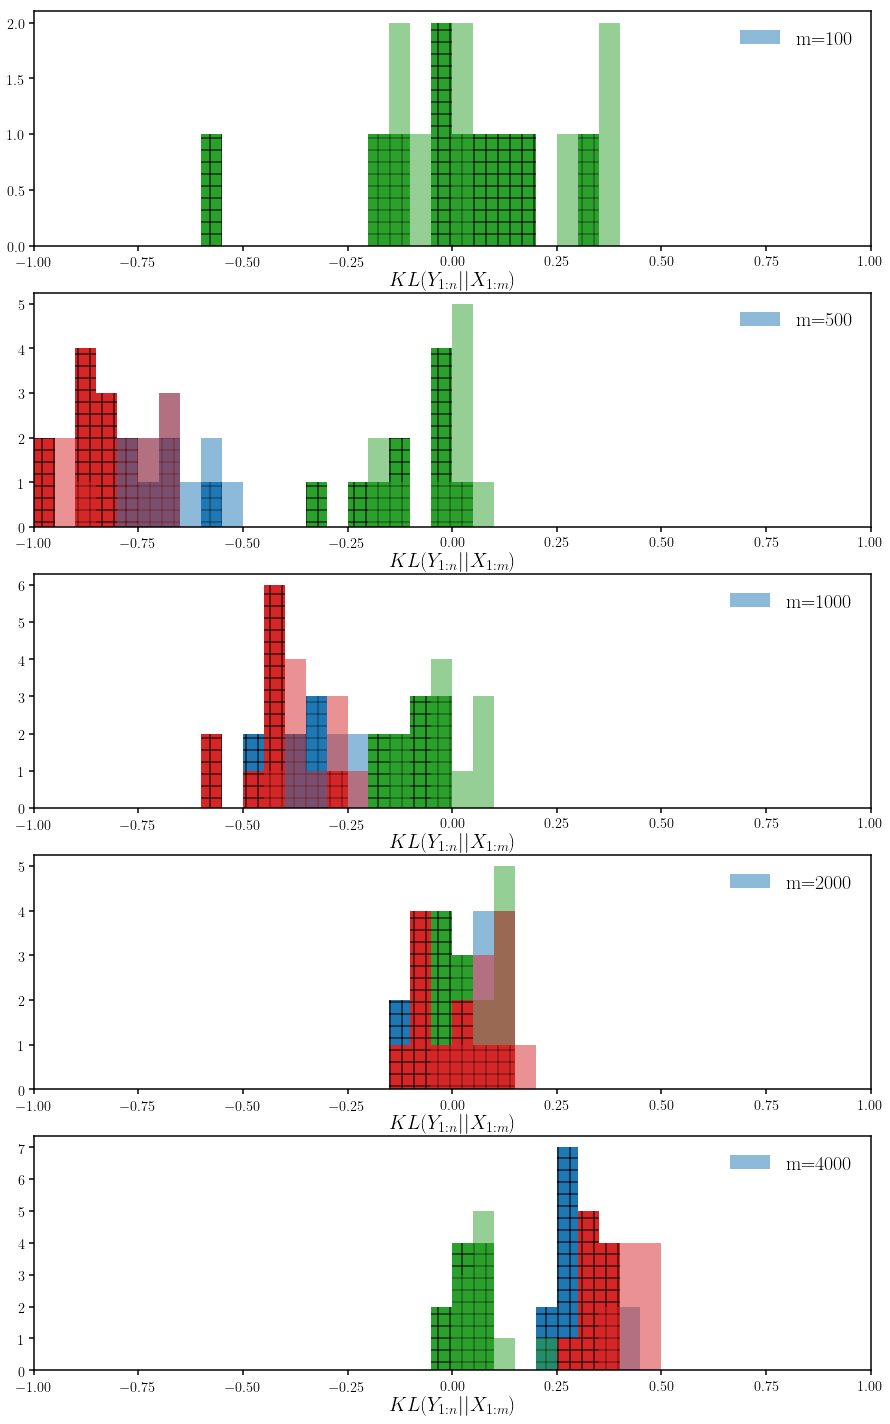

In [51]:
fig = plt.figure(figsize=(15, 5*len(ms)))
for i_m, m in enumerate(ms):
    sub = fig.add_subplot(len(ms),1,i_m+1)
    for ii in [0, 2, 3]: #range(len(pk_kls_yx_list)): 
        sub.hist(ref_kls_yx_list[ii][i_m], range=(-1, 1), bins=40, hatch='+', color='C'+str(ii))
        sub.hist(pk_kls_yx_list[ii][i_m], range=(-1, 1), bins=40, alpha=0.5, color='C'+str(ii), label='m='+str(m))
        if ii == 0: sub.legend(loc="upper right", fontsize=20)
    sub.set_xlabel(r'$KL(Y_{1:n} || X_{1:m})$', fontsize=20)
    sub.set_xlim([-1, 1])